In [18]:
from aqua import Reader
reader = Reader(model='ICON', exp='P4K_CNTL_R02B09', source='P1D', regrid='r100', regrid_method='nn', fix=False)
data = reader.retrieve()

2024-10-17 12:59:23 | smmregrid.regrid |  WARNING -> Logging is already setup with name smmregrid.regrid


2024-10-17 12:52:11 | smmregrid.apply_weights |  WARNING -> Logging is already setup with name smmregrid.apply_weights


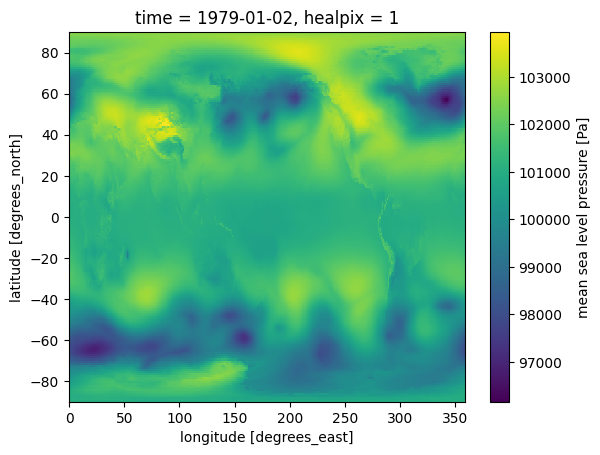

In [17]:
data['psl'].isel(time=0).aqua.regrid().plot()

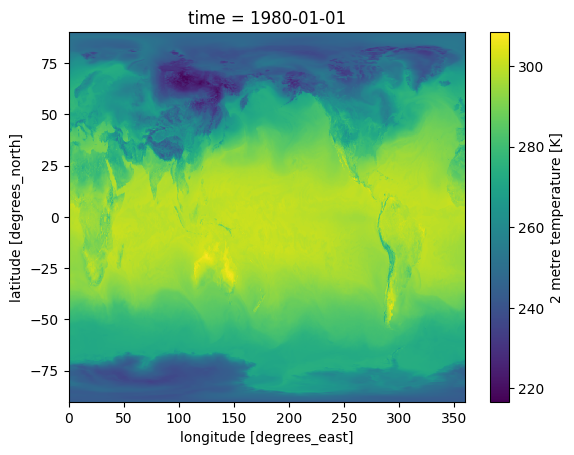

In [10]:
from aqua import Reader
reader = Reader(model='ERA5', exp='arco-era5', source='hourly-r025')
data = reader.retrieve()
data['2m_temperature'].sel(time='1980-01-01T00:00').plot()

In [3]:
from aqua import Reader, inspect_catalog
reader = Reader(model='ERA5', exp='arco-era5', source='hourly-r025')
data = reader.retrieve()
data['2m_temperature'].sel(time='1980-01-01T00:00').plot()

'/work/bb1153/b382076/mambaforge/envs/aqua/share/eccodes/definitions'

In [23]:
from aqua import inspect_catalog
inspect_catalog(catalog_name='nextgems4', model='IFS-FESOM', exp='historical-1990', source='2D_monthly_0.25deg')
reader = Reader(model='IFS-FESOM', exp='historical-1990', source='2D_monthly_0.25deg', fix=False)
data = reader.retrieve()
data['10si'].isel(time=0).to_netcdf('pippo.nc')

In [22]:
data[list(data.data_vars)[0]]

<xarray.DataArray '10si' (time: 360, value: 1038240)> Size: 3GB
dask.array<getitem, shape=(360, 1038240), dtype=float64, chunksize=(1, 1038240), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 8MB dask.array<chunksize=(1038240,), meta=np.ndarray>
    lon      (value) float64 8MB dask.array<chunksize=(1038240,), meta=np.ndarray>
  * time     (time) datetime64[ns] 3kB 1990-02-01 1990-03-01 ... 2020-01-01
Dimensions without coordinates: value
Attributes: (12/14)
    paramId:                    207
    dataType:                   fc
    numberOfPoints:             1038240
    typeOfLevel:                heightAboveGround
    stepUnits:                  1
    stepType:                   avg
    ...                         ...
    units:                      m s**-1
    name:                       10 metre wind speed
    cfVarName:                  si10
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  Latitude/longitude

In [3]:
from aqua import inspect_catalog, Reader
inspect_catalog(catalog_name='nextgems4', model='IFS-FESOM', exp='historical-1990', source='2D_monthly_0.25deg')
reader = Reader(model='IFS-FESOM', exp='historical-1990', source='2D_monthly_0.25deg', regrid='r100', rebuild=True, fix=False)


2024-10-16 12:05:19 :: Reader :: WARNING  -> Grid file is not defined, retrieving the source itself...
2024-10-16 12:05:20 :: Reader :: WARNING  -> Weights file not found: /work/bb1153/b382075/aqua/weights/weights_IFS-FESOM_historical-1990_2D_monthly_0.25deg_ycon_r100_l2d.nc
2024-10-16 12:05:20 :: Reader :: WARNING  -> Attempting to generate it ...
2024-10-16 12:05:24 :: Reader :: WARNING  -> Success!
2024-10-16 12:05:24 :: Reader :: WARNING  -> Destination areas file not found: /work/bb1153/b382075/aqua/areas/cell_area_r100.nc
2024-10-16 12:05:24 :: Reader :: WARNING  -> Attempting to generate it ...
2024-10-16 12:05:24 :: Reader :: WARNING  -> Success!


In [4]:
data = reader.retrieve()

ValueError: the new name 'mtpr' conflicts

In [20]:
from aqua import Reader
reader = Reader(model='ICON', exp='ngc4008', source='P1D', zoom=5)
reasonable_coords = ['depth_full', 'level']
data = reader.retrieve()
#list(set(reasonable_coords) & set(coordinates))

2024-10-01 16:34:00 :: eccodes :: WARNING  -> Variable mslhfl is found in grib1 tables, please check if it is correct
2024-10-01 16:34:00 :: eccodes :: WARNING  -> Variable msshfl is found in grib1 tables, please check if it is correct
2024-10-01 16:34:00 :: eccodes :: WARNING  -> ShortName avg_vo has multiple grib codes associated: ['235138', '263503']
2024-10-01 16:34:00 :: eccodes :: WARNING  -> AQUA will take the first so that avg_vo -> 235138, please set up a correct fix if this does not look right
2024-10-01 16:34:00 :: Reader :: ERROR    -> Variable ocean_fraction_depth_full has no units!
2024-10-01 16:34:00 :: Reader :: ERROR    -> Variable ocean_fraction_depth_half has no units!
2024-10-01 16:34:00 :: Reader :: ERROR    -> Variable ocean_fraction_surface has no units!


In [30]:
data

<xarray.Dataset> Size: 904GB
Dimensions:                              (time: 10958, depth_half: 73,
                                          cell: 12288, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) float64 720B 1.0 ... 90.0
  * level_half                           (level_half) float64 728B 1.0 ... 91.0
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
    idx_depth_half                       (depth_half) int64 584B 0 1 2 ... 71 72
    idx_depth_full                       (depth_full) int64 576B 0 1 2 ... 70 71
Dimensions without coordinates: cell
Data variables: (12/102)
    A_tracer_v_to                        (time, depth_half, cell) float32 39GB dask.array<chunksize=(30, 11, 12288), meta=np.ndarray>
    FrshFlux_IceSalt                     (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    FrshFlux_TotalIce                    (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    Qbot                                 (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    Qtop                                 (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    Wind_Speed_10m                       (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    ...                                   ...
    zghalf                               (level_half, cell) float32 4MB dask.array<chunksize=(91, 12288), meta=np.ndarray>
    zos                                  (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    msnlwrf                              (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    mtnlwrf                              (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    msnswrf                              (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
    mtnswrf                              (time, cell) float32 539MB dask.array<chunksize=(360, 12288), meta=np.ndarray>
Attributes:
    history:  \n2024-10-01 16:34:00 AQUA💧: Retrieved from ICON_ngc4008_P1D us...

In [1]:
from aqua import Reader
reader = Reader('IFS-FESOM', 'ssp370', 'lra-r100-monthly')
reader.retrieve()

KeyboardInterrupt: 

In [1]:
from aqua import LRAgenerator
lra = LRAgenerator(model='IFS-FESOM', exp='ssp370', source='hourly-hpz7-atm2d', var='2t', frequency='monthly', resolution='r100', 
                   tmpdir='/scratch/b/b382076', outdir='/work/bb1153/b382075/aqua/lra/', loglevel='debug')
lra.create_zarr_entry()

2024-07-19 16:46:36 :: lra_generator :: WARNING  -> IMPORTANT: no file will be created, this is a dry run
2024-07-19 16:46:36 :: lra_generator :: INFO     -> Variable(s) to be processed: 2t
2024-07-19 16:46:36 :: lra_generator :: INFO     -> Fixing data: True
2024-07-19 16:46:36 :: create_folder :: INFO     -> Folder /work/bb1153/b382075/aqua/lra/IFS-FESOM/ssp370-ng4/r100/monthly already exists
2024-07-19 16:46:36 :: create_folder :: INFO     -> Creating folder /scratch/b/b382076/LRA_LhTUOJwdKX
2024-07-19 16:46:36 :: lra_generator :: INFO     -> Creating zarr files for IFS-FESOM ssp370-ng4 lra-r100-monthly-zarr
2024-07-19 16:46:36 :: lra_generator :: DEBUG    -> Creating zarr files for full files mtnswrf_ssp370-ng4_r100_monthly
2024-07-19 16:46:38 :: Zarr reference creator :: DEBUG    -> Common coordinates: ['lat', 'lon']
2024-07-19 16:46:38 :: Zarr reference creator :: DEBUG    -> Creating Zarr file from ['/work/bb1153/b382075/aqua/lra/IFS-FESOM/ssp370-ng4/r100/monthly/mtnswrf_ssp370-

ValueError: ERROR: /home/b/b382076/.aqua/catalogs/nextgems4/catalog/IFS-FESOM/ssp370-ng4.yaml not found: you need to have this configuration file!

In [2]:
import timeit
from aqua import Reader
reader1 = Reader('IFS-FESOM', 'ssp370-ng4', 'lra-r100-monthly')
reader2 = Reader('IFS-FESOM', 'ssp370-ng4', 'lra-r100-monthly-zarr')
#data2 = reader2.retrieve()
#data2['2t'].isel(time=35).plot()

2024-04-11 11:39:20 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
2024-04-11 11:39:20 :: Reader :: WARNING  -> The requested default fixer name IFS-FESOM-default does not exist in fixes files
2024-04-11 11:39:20 :: Reader :: WARNING  -> No fixes available for model IFS-FESOM, experiment ssp370-ng4, source lra-r100-monthly
2024-04-11 11:39:20 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
2024-04-11 11:39:20 :: Reader :: WARNING  -> The requested default fixer name IFS-FESOM-default does not exist in fixes files
2024-04-11 11:39:20 :: Reader :: WARNING  -> No fixes available for model IFS-FESOM, experiment ssp370-ng4, source lra-r100-monthly-zarr


In [3]:
start_time = timeit.default_timer()
data2 = reader2.retrieve()
end_time = timeit.default_timer()
print(f"Tempo di esecuzione per reader2.retrieve(): {end_time - start_time} secondi")

start_time = timeit.default_timer()
data1 = reader1.retrieve()
end_time = timeit.default_timer()
print(f"Tempo di esecuzione per reader1.retrieve(): {end_time - start_time} secondi")




/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return 

Tempo di esecuzione per reader2.retrieve(): 0.4457592135295272 secondi
Tempo di esecuzione per reader1.retrieve(): 17.28819192480296 secondi


/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return 

In [7]:
data1.identical(data2)

False

In [6]:
data2

<xarray.Dataset> Size: 45GB
Dimensions:      (lat: 180, level: 69, lon: 360, plev: 19, time: 359)
Coordinates:
  * lat          (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * level        (level) float64 552B 2.5 7.5 12.5 ... 5.825e+03 6.175e+03
  * lon          (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * plev         (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 500.0 100.0
  * time         (time) datetime64[ns] 3kB 2020-02-01 2020-03-01 ... 2049-12-01
    idx_level    (level) int64 552B dask.array<chunksize=(69,), meta=np.ndarray>
Data variables: (12/35)
    2t           (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    avg_siconc   (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    avg_sithick  (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    avg_so       (time, level, lat, lon) float64 13GB dask.array<chunksize=(23, 69, 180, 360), meta=np.ndarray>
    avg_sos      (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    avg_thetao   (time, level, lat, lon) float64 13GB dask.array<chunksize=(23, 69, 180, 360), meta=np.ndarray>
    ...           ...
    t            (time, plev, lat, lon) float64 4GB dask.array<chunksize=(23, 19, 180, 360), meta=np.ndarray>
    tcc          (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    tciw         (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    tclw         (time, lat, lon) float64 186MB dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    u            (time, plev, lat, lon) float64 4GB dask.array<chunksize=(23, 19, 180, 360), meta=np.ndarray>
    v            (time, plev, lat, lon) float64 4GB dask.array<chunksize=(23, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-04-11 11:39:23 AQUA💧: Retrieved from IFS-FESOM_ssp370-ng...

In [5]:
file = []
if not file:
    print('cia')

cia


In [53]:
filelist = ['/work/bb1153/b382076/LRA-lumi/IFS-FESOM/story-2017-historical/r100/monthly/2t_story-2017-historical_r100_monthly_201901.nc',
           '/work/bb1153/b382076/LRA-lumi/IFS-FESOM/story-2017-historical/r100/monthly/2t_story-2017-historical_r100_monthly_2018.nc']

#filelist = list_LRA_files(lrapath, 'IFS-FESOM', 'story-2017-historical')
# open files with kerchunk as hdf
print('Create singles...')
singles = [SingleHdf5ToZarr(filepath, inline_threshold=0).translate() for filepath in sorted(filelist)]
#singles = []
#for u in sorted(filelist):
#    with fsspec.open(u) as inf:
#        h5chunks = SingleHdf5ToZarr(inf, u, inline_threshold=0)
#        singles.append(h5chunks.translate())

# concatenate as a single zarr 
print('Concatenate singles...')
mzz = MultiZarrToZarr(
    singles,
    concat_dims=["time"],
    identical_dims = ['lat', 'lon']
)

mzz.translate()


Create singles...
Concatenate singles...


ValueError: Found chunk size mismatch:
                        at prefix 2t in iteration 1 (file None)
                        new chunk: [12, 180, 360]
                        chunks so far: [1, 180, 360]

In [12]:
lrapath = '/home/b/b382076/work/LRA-lumi/'
files = list_LRA_files(lrapath, 'IFS-FESOM', 'story-2017-historical')
outfile = '/home/b/b382076/work/LRA-lumi/IFS-NEMO_historical-1990_r100_monthly.json'
create_zarr(files, outfile)

Crete singles...


Concatenate singles...
Translate to json...


ValueError: Found chunk size mismatch:
                        at prefix mtdwswrf in iteration 17 (file None)
                        new chunk: [1, 180, 360]
                        chunks so far: [12, 180, 360]

In [ ]:




# where the files are
root_directory = "/pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets/AVISO/data"

# where the output will be
output_filename = "/pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets/AVISO/json/AVISO.json"
files = "dt_global_twosat_phy_l4*.nc"

# Initialize an empty list to store the file paths
file_paths = []

print('Generate file paths...')
# Iterate over all year and month directories
for year in range(1993, 2023):  # Replace YYYY with the start year and n with the number of years
    for month in range(1, 13):
        # Create a pattern to match all daily files in the current year and month directory
        pattern = os.path.join(root_directory, f"{year}/{month:02d}/*")

        # Use glob to find all files matching the pattern
        files = glob.glob(pattern)
        files.sort()

        # Add the absolute paths to the list
        file_paths.extend([os.path.abspath(file) for file in files])


# open files with kerchunk as hdf
print('Create hdf files...')
singles = []
for u in tqdm.tqdm(file_paths):
    with fsspec.open(u) as inf:
        h5chunks = kerchunk.hdf.SingleHdf5ToZarr(inf, u, inline_threshold=100)
        singles.append(h5chunks.translate())

# concatenate as a single zarr 
print('Create single zarr and translate...')
mzz = MultiZarrToZarr(
     singles,
    concat_dims=["time"]
)

# conver to json
out = mzz.translate()

#dump to fle
print('Create json file...')
if os.path.exists(output_filename):
  os.remove(output_filename)
with open(output_filename, "w") as outfile:
    json.dump(out, outfile)

In [2]:
#%load_ext autoreload
#%autoreload 2from aqua import Reader, inspect_catalogue
reader = Reader(model="ICON", exp="ngc3028", source='P1D', loglevel='info', regrid='r100', rebuild=True)
data = reader.retrieve()
data

2024-03-27 15:33:26 :: Reader :: INFO     -> No specific fix found, will call the default fix FESOM-default
2024-03-27 15:33:26 :: Reader :: INFO     -> Fix names FESOM-default found in fixes files
2024-03-27 15:33:26 :: Reader :: INFO     -> Grid metadata is ng5-nodes-2d
2024-03-27 15:33:36 :: Reader :: INFO     -> vert_coord deduced from the source are 2d
2024-03-27 15:33:36 :: Reader :: INFO     -> Source grid: /work/bb1153/b382075/aqua/grids/FESOM/AQUA_NG5_griddes_nodes_IFS.nc
2024-03-27 15:33:36 :: Reader :: WARNING  -> Source areas file not found: /work/bb1153/b382075/aqua/areas/cell_area_ng5-nodes-2d.nc
2024-03-27 15:33:36 :: Reader :: WARNING  -> Attempting to generate it ...
2024-03-27 15:34:03 :: Reader :: WARNING  -> Success!
2024-03-27 15:34:03 :: Reader :: INFO     -> Source grid: /work/bb1153/b382075/aqua/grids/FESOM/AQUA_NG5_griddes_nodes_IFS.nc
2024-03-27 15:34:03 :: Reader :: WARNING  -> Weights file not found: /work/bb1153/b382075/aqua/weights/weights_ng5-nodes-2d_yco

<xarray.Dataset> Size: 696GB
Dimensions:      (time: 1808, nod2: 7402886)
Coordinates:
  * time         (time) datetime64[ns] 14kB 2020-01-20T23:56:00 ... 2024-12-3...
Dimensions without coordinates: nod2
Data variables: (12/13)
    MLD1         (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    mlotst125    (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    atmice_x     (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    atmice_y     (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    atmoce_x     (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    atmoce_y     (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    ...           ...
    avg_sithick  (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    m_snow       (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    mtpr         (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    avg_zos      (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    siue         (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
    sivn         (time, nod2) float32 54GB dask.array<chunksize=(1, 7402886), meta=np.ndarray>
Attributes: (12/18)
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       dfbf523
    FESOM_MeshPath:                      /work/bm1235/ifs-inputs_nxg_c3/fesom...
    FESOM_mesh_representative_checksum:  
    FESOM_ClimateDataPath:               /work/bm1235/ifs-inputs_nxg_c3/fesom...
    ...                                  ...
    FESOM_whichEVP:                      1
    FESOM_evp_rheol_steps:               120
    FESOM_opt_visc:                      5
    FESOM_use_wsplit:                    -1
    FESOM_autorotate_back_to_geo:        -1
    history:                             \n2024-03-27 15:35:52 AQUA💧: Retriev...

In [36]:
from aqua import Reader
from aqua.util import load_yaml, dump_yaml
f = load_yaml('test.yaml')
f['sources']['lra-r100-monthly']['args']['urlpath'] = 100

In [37]:

dump_yaml('our.yaml', f)

In [29]:
from ruamel.yaml import YAML
yaml = YAML(typ='rt')
with open('test.yaml', 'r', encoding='utf-8') as file:
    yaml_text = file.read()
    #print(yaml_text)
    p = yaml.load(yaml_text)
with open('new.yaml', 'w', encoding='utf-8') as file:
        yaml.dump(p, file)


In [10]:
%load_ext autoreload
%autoreload 2
from aqua import Reader
#inspect_catalogue(model='ICON', exp='ngc3026')
#reader = Reader(model="ICON", exp="ngc3026", source='P1D', loglevel='debug')
reader = Reader(model="GPM", exp="imerg", source='hourly', loglevel='info', rebuild=True)
data = reader.retrieve()

2023-09-22 12:20:39 :: Reader :: INFO     -> No specific fixes available for model GPM, experiment imerg, source hourly: checking for model default...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2023-09-22 12:20:39 :: Reader :: INFO     -> Using default for model GPM, experiment imerg
2023-09-22 12:20:39 :: Reader :: INFO     -> For source hourly, method for fixes is: replace
2023-09-22 12:20:40 :: Reader :: INFO     -> Data model: ./config/data_models/cf2cds.json
2023-09-22 12:20:42 :: Reader :: INFO     -> Grib variable tprate, looking for attributes
2023-09-22 12:20:42 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-09-22 12:20:42 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-09-22 12:20:42 :: Reader :: INFO     -> Grib attributes for tprate: {'paramId': '260048', 'long_name': 'Total precipitation rate', 'units': 'kg m**-2 s**-1', 'cfVarName': 'tprate', 'shortName': 'tprate'}
2023-09-22 12:20:42 :: Reader :: INFO     -> Converting tprate: mm/hr --> kg m**-2 s**-1
2023-09-22 12:20:42 :: Reader :: INFO     -> tprate: corrected m

In [11]:
data

<xarray.Dataset>
Dimensions:    (time: 15336, bnds: 2, lon: 3600, lat: 1200)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T00:15:00 ... 2021-09-30T23:15:00
  * lon        (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat        (lat) float32 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(24, 2), meta=np.ndarray>
    tprate     (time, lat, lon) float32 dask.array<chunksize=(24, 1200, 3600), meta=np.ndarray>
Attributes:
    CDI:                                    Climate Data Interface version 1....
    history:                                Sun Aug 01 20:58:34 2021: cdo mer...
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-HH/06;\n...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=6a;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-HHR.MS.MRG.3IMERG.20200101-S00...
    history_L34RS:                          'Created by L34RS v1.4.2 @ NASA G...
    NCO:                                    netCDF Operators version 4.9.7 (H...
    CDO:                                    Climate Data Operators version 1....

In [6]:
%load_ext autoreload
%autoreload 2
from aqua import OPAgenerator
import os

opaopa = OPAgenerator(model="IFS", exp="test-tco79", source="long", var='2t',
                        frequency='daily', outdir="onepass_test/", tmpdir="onepass_test/",
                        definitive=False, loglevel='DEBUG')
opaopa.retrieve()
opaopa.generate_opa()
assert os.path.isdir(os.path.join(os.getcwd(), "onepass_test",
                                    "IFS/test-tco79/daily"))

2023-09-22 11:35:00 :: opa_generator :: WARNING  -> IMPORTANT: no file will be created, this is a dry run
2023-09-22 11:35:00 :: opa_generator :: WARNING  -> Variable(s) to be processed: 2t
2023-09-22 11:35:00 :: create_folder :: WARNING  -> Folder onepass_test/IFS/test-tco79/daily already exists
2023-09-22 11:35:00 :: create_folder :: WARNING  -> Folder onepass_test/ already exists
2023-09-22 11:35:00 :: opa_generator :: INFO     -> Accessing catalog for IFS-test-tco79-long...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
onepass_test/


2023-09-22 11:35:01 :: Reader :: INFO     -> Fixes found for model IFS, experiment test-tco79, source long
2023-09-22 11:35:01 :: Reader :: INFO     -> For source long, method for fixes is: merge
2023-09-22 11:35:01 :: Reader :: DEBUG    -> Merging default fixes with source-specific fixes
2023-09-22 11:35:01 :: Reader :: DEBUG    -> Final fixes are: {'data_model': 'ifs', 'deltat': 3600, 'jump': 'month', 'vars': {'tprate': {'source': 'tp', 'grib': True, 'decumulate': True, 'src_units': 'm', 'units': 'kg m**-2 s**-1'}, 'cprate': {'source': 'cp', 'grib': True, 'decumulate': True, 'src_units': 'm', 'units': 'kg m**-2 s**-1'}, 'mlsprt': {'source': 'lsp', 'grib': True, 'decumulate': True, 'src_units': 'm', 'units': 'kg m**-2 s**-1'}, 'erate': {'source': 'e', 'grib': True, 'decumulate': True, 'src_units': 'm', 'units': 'kg m**-2 s**-1'}, 'esrate': {'source': 'es', 'grib': True, 'decumulate': True, 'src_units': 'm', 'units': 'kg m**-2 s**-1'}, 'mrort': {'source': 'ro', 'grib': True, 'decumulat

{'stat': 'mean', 'percentile_list': None, 'thresh_exceed': None, 'stat_freq': 'daily', 'output_freq': 'monthly', 'time_step': 60, 'variable': '2t', 'save': True, 'checkpoint': True, 'out_filepath': 'onepass_test/IFS/test-tco79/daily', 'checkpoint_filepath': 'onepass_test/', 'pickle_limit': 1.6, 'checkpoint_file': 'onepass_test/checkpoint_2t_daily_monthly_mean.pkl', 'checkpoint_file_zarr': 'onepass_test/checkpoint_2t_daily_monthly_mean.pkl.zarr'}


2023-09-22 11:35:02 :: opa_generator :: INFO     -> start_date: 2020-01-20T00:00:00.000000000 stop_date: 2020-01-24T23:00:00.000000000
2023-09-22 11:35:02 :: opa_generator :: INFO     -> start_date: 2020-01-25T00:00:00.000000000 stop_date: 2020-01-29T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> start_date: 2020-01-30T00:00:00.000000000 stop_date: 2020-02-03T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> start_date: 2020-02-04T00:00:00.000000000 stop_date: 2020-02-08T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> start_date: 2020-02-09T00:00:00.000000000 stop_date: 2020-02-13T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> start_date: 2020-02-14T00:00:00.000000000 stop_date: 2020-02-18T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> start_date: 2020-02-19T00:00:00.000000000 stop_date: 2020-02-23T23:00:00.000000000
2023-09-22 11:35:03 :: opa_generator :: INFO     -> sta

In [13]:
%load_ext autoreload
%autoreload 2
from aqua import Reader, inspect_catalogue
#inspect_catalogue(model='ICON', exp='ngc3026')
#reader = Reader(model="ICON", exp="ngc3026", source='P1D', loglevel='debug')
reader = Reader(model="FESOM", exp="tco3999-ng5", source='interpolated_global_UV', loglevel='info')#), rebuild=True, regrid='r200', loglevel='info', fix=False)

#reader = Reader(model="IFS", exp="tco2559-ng5-cycle3", source='2D_monthly_1deg')
data = reader.retrieve()
data
#data[data.data_vars[-1]]
#reader.timmean(data['ttr'], exclude_incomplete=True)

2023-09-21 13:19:09 :: Reader :: INFO     -> No specific fixes available for model FESOM, experiment tco3999-ng5
2023-09-21 13:19:09 :: Reader :: INFO     -> Default model FESOM fixes found! Using it for experiment tco3999-ng5, source interpolated_global_UV


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2023-09-21 13:19:09 :: Reader :: INFO     -> Grib variable ci, looking for attributes
2023-09-21 13:19:09 :: Reader :: INFO     -> Grib attributes for ci: {'paramId': '31', 'long_name': 'Sea ice area fraction', 'units': '(0 - 1)', 'cfVarName': 'siconc', 'shortName': 'ci'}
2023-09-21 13:19:09 :: Reader :: INFO     -> Grib variable sst, looking for attributes
2023-09-21 13:19:09 :: eccodes :: WARNING  -> ShortName sst have multiple grib codes associated: ['34', '151159']
2023-09-21 13:19:09 :: eccodes :: WARNING  -> AQUA will take the first so that sst -> 34, please set up a correct fix if this does not look right
2023-09-21 13:19:09 :: Reader :: INFO     -> Grib attributes for sst: {'paramId': '34', 'long_name': 'Sea surface temperature', 'units': 'K', 'cfVarName': 'sst', 'shortName': 'sst'}
2023-09-21 13:19:09 :: Reader :: INFO     -> Grib variable sos, looking for attributes
2023-09-21 13:19:09 :: Reader :: INFO     -> Grib attributes for sos: {'paramId': '262100', 'long_name': 'Sea s

<xarray.Dataset>
Dimensions:    (depth: 2, lat: 2700, time: 1800, lon: 5400)
Coordinates:
  * depth      (depth) float64 2.5 97.5
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20T02:56:00 ... 2020-08-31T23:56:00
Data variables:
    uo         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 1, 1350, 2700), meta=np.ndarray>
    vo         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 1, 1350, 2700), meta=np.ndarray>
Attributes: (12/22)
    FESOM_ClimateDataPath:               /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_MeshPath:                      /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       469e74b1
    FESOM_include_fleapyear:             -1
    ...                                  ...
    box:                                 -180, 180, -90, 90
    data:                                /work/bm1235/a270046/cycle2-sync/tco...
    influence:                           80000
    interp:                              nn
    meshpath:                            /work/ab0995/a270088/meshes/NG5
    history:                             2023-09-21 13:19:09 retrieved by AQU...

In [11]:
data['u']

<xarray.DataArray 'u' (time: 1800, depth: 2, lat: 2700, lon: 5400)>
dask.array<open_dataset-u, shape=(1800, 2, 2700, 5400), dtype=float32, chunksize=(1, 1, 1350, 2700), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 2.5 97.5
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20T02:56:00 ... 2020-08-31T23:56:00

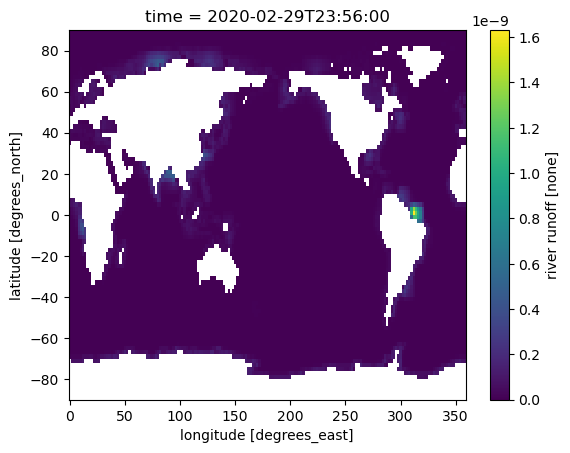

In [30]:
reader.regrid(data['runoff'][1,:]).plot()

In [ ]:
reader.timmean(data, freq='yearly',exclude_incomplete=True).time

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd, MonthBegin


normalized = data.time.to_index().to_period('1M').to_timestamp()
normalized[0]

In [ ]:
end=normalized[-1]
end

In [ ]:
import pandas as pd
chunks = pd.date_range(start=normalized[0], end=end, freq='1MS')
chunks


In [ ]:
from aqua import Reader
reader = Reader('IFS', 'tco1279-orca025', 'ICMGG_atm2d')
data = reader.retrieve(var='2t')
data

In [ ]:
subdata = data.isel(time=slice(0,80))

In [ ]:
from aqua import Reader
reader = Reader('ERA5', 'era5', 'monthly', loglevel='DEBUG')
data = reader.retrieve(var='tcc')

In [ ]:
%load_ext autoreload
%autoreload 2
#from aqua.util import check_chunk_completeness
#check_chunk_completeness(subdata, resample_frequency='3D')

from aqua import Reader
reader = Reader('IFS', 'tco1279-orca025', 'ICMGG_atm2d', exclude_incomplete=True)
data = reader.retrieve(var='2t')
subdata = data.isel(time=slice(0,80))
reader.timmean(subdata['2t'], freq='daily')

In [ ]:
import pandas as pd
pd.Timestamp('2020-01-01 01:00:00') - pd.Timestamp('2020-01-01 00:00:00') 

In [ ]:
import pandas as pd
import xarray as xr
from pandas.tseries.frequencies import to_offset
import math

def timedelta_to_period_string(timedelta):
    hours = math.floor(timedelta.total_seconds() / 3600)
    days = math.floor(hours / 24)
    months = math.floor(days / 28)  # Minimum month has around 28 days
    years = math.floor(days / 365)  # Assuming an average year has around 365 days
    #print([hours, days, months, years])
    
    if years >= 1:
        return f"{years}Y"
    elif months >= 1:
        return f"{months}M"
    elif days >= 1:
        return f"{days}D"
    else :
        return f"{hours}H"
 
def generate_expected_time_series(start_date, frequency, time_period):
    
    end_date = find_end_date(start_date, time_period)

    time_series = pd.date_range(start=start_date, end=end_date, freq=frequency, inclusive='left')
    return time_series

def find_end_date(start_date, time_period):

    start_date = pd.Timestamp(start_date)
    end_date = start_date + to_offset(time_period)
    if 'Y' in time_period or 'M' in time_period:
        end_date = end_date + pd.DateOffset(days=1)
    return end_date

In [ ]:
import pandas as pd
import xarray as xr
from pandas.tseries.frequencies import to_offset
import math

def timedelta_to_period_string(timedelta):
    hours = math.floor(timedelta.total_seconds() / 3600)
    days = math.floor(hours / 24)
    months = math.floor(days / 28)  # Minimum month has around 28 days
    years = math.floor(days / 365)  # Assuming an average year has around 365 days
    #print([hours, days, months, years])
    
    if years >= 1:
        return f"{years}Y"
    elif months >= 1:
        return f"{months}M"
    elif days >= 1:
        return f"{days}D"
    else :
        return f"{hours}H"
 
def generate_expected_time_series(start_date, frequency, time_period):
    
    end_date = find_end_date(start_date, time_period)

    time_series = pd.date_range(start=start_date, end=end_date, freq=frequency, inclusive='left')
    return time_series

def find_end_date(start_date, time_period):

    start_date = pd.Timestamp(start_date)
    end_date = start_date + to_offset(time_period)
    if 'Y' in time_period or 'M' in time_period:
        end_date = end_date + pd.DateOffset(days=1)
    return end_date


resample_frequency = '1D'
time_diffs = pd.Timedelta(subdata.time.diff('time').mean().values)
data_frequency = timedelta_to_period_string(time_diffs)
chunks = pd.date_range(start=subdata.time[0].values, end=subdata.time[-1].values, freq=resample_frequency)
print(len(chunks))
if len(chunks) == 0:
    raise ValueError('Cannot compute average')

check_completeness = []
for chunk in chunks:
    print([chunk, find_end_date(chunk, ffff)])
    expected_timeseries = generate_expected_time_series(chunk, data_frequency, resample_frequency)
    expected_len = len(expected_timeseries)
    try: 
        effective_len = len(subdata.time.sel(time=expected_timeseries))
        check_completeness.append(1)
    except KeyError as exc:
        effective_len = len(subdata.time.sel(time=slice(chunk, find_end_date(chunk, ffff))))
        print(f'Chunk for {chunk} has {effective_len} elements instead of expected {expected_len}, timmean() will exclude this')
        
        check_completeness.append(0)
    #print(expected_len)
    #print(effective_len)

out = subdata.resample(time=resample_frequency).mean()
boolean_mask = xr.DataArray(check_completeness, dims=('time',), coords={'time': out.time})
out = out.where(boolean_mask, drop=True)
out

In [ ]:
taxis = subdata.time.resample(time=resample_frequency).mean()
taxis

In [ ]:
out = subdata.resample(time='1D').mean()
out

In [ ]:
%load_ext autoreload
%autoreload 2

from aqua import Reader
#reader = Reader('FESOM', 'tco2559-ng5-cycle3', '2D_monthly_native', loglevel='info')
reader = Reader('IFS', 'control-1950-devcon', 'lra-r100-monthly', loglevel='info')
#reader = Reader('IFS', 'tco1279-orca025', 'ICMGG_atm2d', loglevel='info')
#reader = Reader('ERA5', 'era5', 'monthly', loglevel='info')
#reader = Reader('ICON', 'ngc3028', 'P1D')
data = reader.retrieve()
data

#reader.regrid(data['ci'][0,:]).plot()


In [ ]:
%autoreload 2
reader = Reader(model="IFS", exp="test-tco79", source='long',freq='yearly', fix=False)
data = reader.retrieve()
reader.timmean(data['ttr'], exclude_incomplete=True)



In [ ]:
reader.fixes_dictionary['defaults']['units']['fix'].keys()

In [ ]:
resample_freq = '1M'
out = data.resample(time=resample_freq).mean()


In [ ]:
data.time.resample(time=resample_freq).min().dt.floor('D').values

In [ ]:
out = data.resample(time=resample_freq).mean()
out['time'] = out['time'].to_index().to_period('1M').to_timestamp().values

In [ ]:
import xarray as xr
data_resampled_min = data.time.resample(time=resample_freq).min()
data_resampled_max = data.time.resample(time=resample_freq).max()
# Create a new variable 'time_bnds' with minimum and maximum values for each resampled time period
time_bnds = xr.concat([data_resampled_min, data_resampled_max], dim='bnds')
#time_bnds.coords['bnds'] = [0, 1]
time_bnds.name = 'time_bnds'
time_bnds[:,1]



In [ ]:
out['time_bnds'] = time_bnds
out.time_bnds

In [ ]:
reader = Reader('IFS', 'tco2559-ng5-cycle3', '2D_monthly_native')

In [ ]:
#data['ci'][0,:].to_netcdf('~/work/tco2559_ci.nc')

In [ ]:
reader = Reader('FESOM', 'tco2559-ng5-cycle3', 'lra-r100-monthly')
data = reader.retrieve(var='ocpt')
data

In [ ]:
short = data['temp'][0:60,:,:]
short

In [ ]:
import pandas as pd
avg = reader.timmean(short)
#avg['time'] = avg['time'].dt.floor('D')
avg['time'].dt.to_period('M').dt.to_timestamp()
avg

In [ ]:
resample_freq = '1M'
out = short.resample(time=resample_freq).mean()
out

In [ ]:
#proper_time = short.time.resample(time=resample_freq).min().dt.floor('D')
out['time'] = short.time.resample(time=resample_freq).min().dt.floor('D')
out

In [ ]:
out['time'] = out['time'].dt.floor('D')
out

In [ ]:


proper_time = data.time.resample(time=resample_freq).min()
proper_time

In [ ]:
import numpy as np
proper_time.dt.round('D')

In [ ]:

np.array(proper_time.values, dtype='datetime64[h]')